In [161]:
#importing necessary librabries.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
# facenet is the main architecture of our model
from dnn_face_detection import detect_face
# this will detect the face from the given picture
from sklearn.metrics.pairwise import cosine_similarity
# it will give us the cosine similarity of our main image and testing image

In [176]:
# read our main image

main_img = cv2.imread("C:\\Users\\Admin\\info\\similarity assignment\\pic1.jpg")

In [177]:
def plot_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#making an funtion to show an image

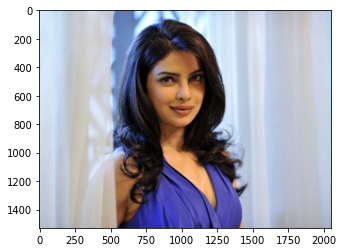

In [178]:
plot_img(main_img)
#plotting an image

In [180]:
def face_detection(img):
    faces = detect_face(img)
    #calling a funtion detect_face which will detech face from our image
    #print(faces.shape)
    for bounding_box in faces:
        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        #it gives us 4 points which will bound the face of the image
        #print(x,y,x2,y2)
        crop_face  = img[y:y2, x:x2]
        #cropping and extracting only face from our image
        crop_face = cv2.resize(crop_face, (160,160))
        #resizing our image to the necessary input shaope. 
        #NOTE: Our algorithm facenet takes image of shape 160*160 only.
    return crop_face

In [181]:
my_face = face_detection(main_img)


In [182]:
#setting up facenet algorithm 
embdeer = FaceNet()

In [183]:
my_embeding = embdeer.embeddings(np.expand_dims(my_face, axis=0))
# this will evaluate the face and take out necessary features form our the given face.

1/1 [==============================] - 3s 3s/step


In [184]:
#since we want all faces so we will run a loop

#make a list of all images:
import os

Image_path =  os.listdir("C:\\Users\\Admin\\info\\similarity assignment\\images\\")

In [185]:
Image_path[:10]

['-preet-singh-indian-celebrity-bollywood-indian-indian-actress-beautiful-cute.jpg',
 '0002-shah-rukh-khan.jpg',
 '0539-katrina-kaif.jpg',
 '1-2-750x478.jpg',
 '1.Aishwarya-Rai.jpg',
 '1.jpeg',
 '1044158-cannes-2022-looks.png',
 '1100043-indian-celebs.jpg',
 '13-Bollywood-celebrity-approved-hairstyles-to-try-this-monsoon.jpg',
 '154321-mthcwbwnvx-1612367457.jpg']

In [186]:
pathname = ["C:\\Users\\Admin\\info\\similarity assignment\\images\\" + images for images in Image_path]
#making the path ready for all the input images

In [187]:

pathname[:5]

['C:\\Users\\Admin\\info\\similarity assignment\\images\\-preet-singh-indian-celebrity-bollywood-indian-indian-actress-beautiful-cute.jpg',
 'C:\\Users\\Admin\\info\\similarity assignment\\images\\0002-shah-rukh-khan.jpg',
 'C:\\Users\\Admin\\info\\similarity assignment\\images\\0539-katrina-kaif.jpg',
 'C:\\Users\\Admin\\info\\similarity assignment\\images\\1-2-750x478.jpg',
 'C:\\Users\\Admin\\info\\similarity assignment\\images\\1.Aishwarya-Rai.jpg']

In [188]:
# os.mkdir()
count = 100
for path in pathname:
    try:
        img = cv2.imread(path)
        img_face = face_detection(img)
        embading = embdeer.embeddings(np.expand_dims(img_face, axis = 0))
        similarity_score = cosine_similarity(my_embeding,embading)
        print(similarity_score)
        if similarity_score > 0.7:
            write_path = f"C:\\Users\\Admin\\info\\similarity assignment\\test\\{count}.jpg"
            cv2.imwrite(write_path,img)
            count = count +  1
    except:
        print("ERROR!")

    #after seeeing the reason, we note that, the picture having the image of pritanka chopra with other celebraties have not been displayed.
    #the reason might be, the algotithm test for only the one face on the picture and neglects the other one.
    #also, there are about 15 files where our algorithm cannot detect the face and given error.

1/1 [==============================] - 0s 196ms/step
[[0.3467325]]
1/1 [==============================] - 0s 407ms/step
[[0.07438359]]
1/1 [==============================] - 0s 195ms/step
[[0.37739947]]
1/1 [==============================] - 0s 207ms/step
[[0.3374609]]
1/1 [==============================] - 0s 267ms/step
[[0.43984926]]
1/1 [==============================] - 0s 217ms/step
[[0.24347565]]
1/1 [==============================] - 0s 223ms/step
[[0.4953984]]
1/1 [==============================] - 0s 204ms/step
[[0.12904799]]
1/1 [==============================] - 0s 338ms/step
[[0.14290881]]
1/1 [==============================] - 0s 260ms/step
[[-0.05956095]]
1/1 [==============================] - 0s 280ms/step
[[0.119756]]
1/1 [==============================] - 0s 207ms/step
[[0.10502253]]
1/1 [==============================] - 0s 256ms/step
[[0.30540147]]
1/1 [==============================] - 0s 224ms/step
[[0.6707574]]
1/1 [==============================] - 0s 196ms/step


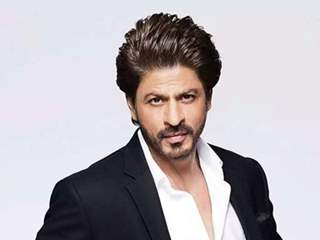

In [96]:
from IPython.display import Image
Image(pathname[1])